# 모듈 설치

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
pd.set_option('display.max_columns', None)

plt.style.use("ggplot")

# 데이터 로드

In [2]:
train = pd.read_csv("train.csv", index_col="Id")
test = pd.read_csv("test.csv", index_col="Id")
sub = pd.read_csv("sample_submission.csv", index_col="Id")

# 데이터 전처리

In [3]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [4]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
set(train.columns) - set(test.columns)

{'SalePrice'}

In [6]:
tra_tar = train["SalePrice"]
tra_tar = tra_tar.reset_index(drop=True)
tra_tar

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
train_null = train.isnull().sum()
train_sum = train_null[train_null > 0].sort_values(ascending=False)
train_sum

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
# 결측치가 1000개가 넘어가는 데이터는 학습에 이상을 줄 수 있다 판단하여 제거
train = train.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"])

In [9]:
test = test.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"])

In [10]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [11]:
# 의미가 겹치는 컬럼 삭제
train = train.drop(columns=["Condition2", "RoofMatl", "Exterior2nd", "MasVnrArea", "ExterCond", "BsmtFinType2", "BsmtFinSF2", "BsmtCond", 
                   "BsmtUnfSF", "LowQualFinSF", "BsmtHalfBath", "HalfBath", "GarageFinish", "GarageCars", "GarageCond", "EnclosedPorch", 
                   "3SsnPorch", "ScreenPorch", "FireplaceQu", "LotFrontage"])

In [12]:
test = test.drop(columns=["Condition2", "RoofMatl", "Exterior2nd", "MasVnrArea", "ExterCond", "BsmtFinType2", "BsmtFinSF2", "BsmtCond", 
                   "BsmtUnfSF", "LowQualFinSF", "BsmtHalfBath", "HalfBath", "GarageFinish", "GarageCars", "GarageCond", "EnclosedPorch", 
                   "3SsnPorch", "ScreenPorch", "FireplaceQu", "LotFrontage"])

In [13]:
train = train.dropna()

In [14]:
tra_tar = train["SalePrice"]
tra_tar = tra_tar.reset_index(drop=True)
tra_tar

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1334    175000
1335    210000
1336    266500
1337    142125
1338    147500
Name: SalePrice, Length: 1339, dtype: int64

In [15]:
test_null = test.isnull().sum()
test_sum = test_null[test_null > 0].sort_values(ascending=False)
test_sum

GarageQual      78
GarageYrBlt     78
GarageType      76
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
MasVnrType      16
MSZoning         4
Utilities        2
BsmtFullBath     2
Functional       2
GarageArea       1
TotalBsmtSF      1
KitchenQual      1
BsmtFinSF1       1
Exterior1st      1
SaleType         1
dtype: int64

In [16]:
test["GarageQual"] = test["GarageQual"].fillna("None")
test["GarageType"] = test["GarageType"].fillna("None")
test["BsmtQual"] = test["BsmtQual"].fillna("None")
test["BsmtExposure"] = test["BsmtExposure"].fillna("None")
test["BsmtFinType1"] = test["BsmtFinType1"].fillna("None")
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MSZoning"] = test["MSZoning"].fillna("None")
test["Utilities"] = test["Utilities"].fillna("None")
test["Functional"] = test["Functional"].fillna("None")
test["KitchenQual"] = test["KitchenQual"].fillna("None")
test["Exterior1st"] = test["Exterior1st"].fillna("None")
test["SaleType"] = test["SaleType"].fillna("None")
# GarageYrBlt / BsmtFullBath / GarageArea / TotalBsmtSF / BsmtFinSF1 

In [17]:
test["GarageYrBlt"].value_counts(ascending=True)
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)

In [18]:
test["BsmtFullBath"].value_counts(ascending=True)
test["BsmtFullBath"] = test["BsmtFullBath"].fillna(0)

In [19]:
test["GarageArea"].value_counts(ascending=True)
test["GarageArea"] = test["GarageArea"].fillna(0)

In [20]:
test["TotalBsmtSF"].value_counts(ascending=True)
test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(0)

In [21]:
test["BsmtFinSF1"].value_counts(ascending=True)
test["BsmtFinSF1"] = test["BsmtFinSF1"].fillna(0)

In [22]:
train.isnull().sum().sum()
test.isnull().sum().sum()

0

# 원핫 인코딩, 데이터 분할

In [23]:
train.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
train # 1460 / 1339개

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,706,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,3,1,Gd,8,Typ,0,Attchd,2003.0,548,TA,Y,0,61,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,978,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,3,1,TA,6,Typ,1,Attchd,1976.0,460,TA,Y,298,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,486,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,3,1,Gd,6,Typ,1,Attchd,2001.0,608,TA,Y,0,42,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,None,TA,BrkTil,TA,No,ALQ,216,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,3,1,Gd,7,Typ,1,Detchd,1998.0,642,TA,Y,0,35,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,655,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,4,1,Gd,9,Typ,1,Attchd,2000.0,836,TA,Y,192,84,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,None,TA,PConc,Gd,No,Unf,0,953,GasA,Ex,Y,SBrkr,953,694,1647,0,2,3,1,TA,7,Typ,1,Attchd,1999.0,460,TA,Y,0,40,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Stone,TA,CBlock,Gd,No,ALQ,790,1542,GasA,TA,Y,SBrkr,2073,0,2073,1,2,3,1,TA,7,Min1,2,Attchd,1978.0,500,TA,Y,349,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,None,Ex,Stone,TA,No,GLQ,275,1152,GasA,Ex,Y,SBrkr,1188,1152,2340,0,2,4,1,Gd,9,Typ,2,Attchd,1941.0,252,TA,Y,0,60,0,2500,5,2010,WD,Normal,266500


In [25]:
test #1461 ~ 2919

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,1Fam,1Story,5,6,1961,1961,Gable,VinylSd,None,TA,CBlock,TA,No,Rec,468.0,882.0,GasA,TA,Y,SBrkr,896,0,896,0.0,1,2,1,TA,5,Typ,0,Attchd,1961.0,730.0,TA,Y,140,0,0,0,6,2010,WD,Normal
1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,1Fam,1Story,6,6,1958,1958,Hip,Wd Sdng,BrkFace,TA,CBlock,TA,No,ALQ,923.0,1329.0,GasA,TA,Y,SBrkr,1329,0,1329,0.0,1,3,1,Gd,6,Typ,0,Attchd,1958.0,312.0,TA,Y,393,36,0,12500,6,2010,WD,Normal
1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,5,5,1997,1998,Gable,VinylSd,None,TA,PConc,Gd,No,GLQ,791.0,928.0,GasA,Gd,Y,SBrkr,928,701,1629,0.0,2,3,1,TA,6,Typ,1,Attchd,1997.0,482.0,TA,Y,212,34,0,0,3,2010,WD,Normal
1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,6,1998,1998,Gable,VinylSd,BrkFace,TA,PConc,TA,No,GLQ,602.0,926.0,GasA,Ex,Y,SBrkr,926,678,1604,0.0,2,3,1,Gd,7,Typ,1,Attchd,1998.0,470.0,TA,Y,360,36,0,0,6,2010,WD,Normal
1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,HdBoard,None,Gd,PConc,Gd,No,ALQ,263.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,1280,0.0,2,2,1,Gd,5,Typ,0,Attchd,1992.0,506.0,TA,Y,0,82,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,None,TA,CBlock,TA,No,Unf,0.0,546.0,GasA,Gd,Y,SBrkr,546,546,1092,0.0,1,3,1,TA,5,Typ,0,None,0.0,0.0,None,Y,0,0,0,0,6,2006,WD,Normal
2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,None,TA,CBlock,TA,No,Rec,252.0,546.0,GasA,TA,Y,SBrkr,546,546,1092,0.0,1,3,1,TA,6,Typ,0,CarPort,1970.0,286.0,TA,Y,0,24,0,0,4,2006,WD,Abnorml
2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,None,TA,CBlock,TA,No,ALQ,1224.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,1224,1.0,1,4,1,TA,7,Typ,1,Detchd,1960.0,576.0,TA,Y,474,0,0,0,9,2006,WD,Abnorml


In [26]:
all_data = pd.concat([train.drop(columns="SalePrice"), test])
all_data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,706.0,856.0,GasA,Ex,Y,SBrkr,856,854,1710,1.0,2,3,1,Gd,8,Typ,0,Attchd,2003.0,548.0,TA,Y,0,61,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,978.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,1262,0.0,2,3,1,TA,6,Typ,1,Attchd,1976.0,460.0,TA,Y,298,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,486.0,920.0,GasA,Ex,Y,SBrkr,920,866,1786,1.0,2,3,1,Gd,6,Typ,1,Attchd,2001.0,608.0,TA,Y,0,42,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,None,TA,BrkTil,TA,No,ALQ,216.0,756.0,GasA,Gd,Y,SBrkr,961,756,1717,1.0,1,3,1,Gd,7,Typ,1,Detchd,1998.0,642.0,TA,Y,0,35,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,655.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,2198,1.0,2,4,1,Gd,9,Typ,1,Attchd,2000.0,836.0,TA,Y,192,84,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,None,TA,CBlock,TA,No,Unf,0.0,546.0,GasA,Gd,Y,SBrkr,546,546,1092,0.0,1,3,1,TA,5,Typ,0,None,0.0,0.0,None,Y,0,0,0,0,6,2006,WD,Normal
2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,None,TA,CBlock,TA,No,Rec,252.0,546.0,GasA,TA,Y,SBrkr,546,546,1092,0.0,1,3,1,TA,6,Typ,0,CarPort,1970.0,286.0,TA,Y,0,24,0,0,4,2006,WD,Abnorml
2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,None,TA,CBlock,TA,No,ALQ,1224.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,1224,1.0,1,4,1,TA,7,Typ,1,Detchd,1960.0,576.0,TA,Y,474,0,0,0,9,2006,WD,Abnorml


In [27]:
all_pd = pd.get_dummies(all_data)
all_pd

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_None,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706.0,856.0,856,854,1710,1.0,2,3,1,8,0,2003.0,548.0,0,61,0,0,2,2008,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0

In [28]:
re_train = all_pd.loc[1 : 1460, :]
re_train = re_train.reset_index(drop=True)
re_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_None,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,856.0,856,854,1710,1.0,2,3,1,8,0,2003.0,548.0,0,61,0,0,2,2008,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,1262.0,1262,0,1262,0.0,2,3,1,6,1,1976.0,460.0,298,0,0,0,5,2007,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1

In [29]:
# 1461 ~ 2919
re_test = all_pd.loc[1461 : , :]
re_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_None,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,5,6,1961,1961,468.0,882.0,896,0,896,0.0,1,2,1,5,0,1961.0,730.0,140,0,0,0,6,2010,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0

In [30]:
re_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Columns: 214 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(5), int64(20), uint8(189)
memory usage: 508.8 KB


# target 값 조정

<AxesSubplot:>

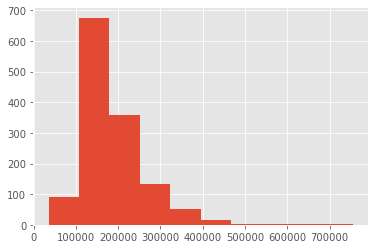

In [31]:
tra_tar.hist()

In [32]:
tra_tar.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [33]:
# 시리즈는 MM스케일 적용이 안되나요?
print(tra_tar.min())
print(tra_tar.max())
# tra_tar_mm = 
tra_tar_mm = (tra_tar - tra_tar.min()) / (tra_tar.max() - tra_tar.min())
tra_tar_mm

35311
755000


0       0.240644
1       0.203128
2       0.261487
3       0.145464
4       0.298308
          ...   
1334    0.194096
1335    0.242728
1336    0.321235
1337    0.148417
1338    0.155885
Name: SalePrice, Length: 1339, dtype: float64

# 머신러닝 작동(학습 및 평가)

In [34]:
# tra_tar
# cv으로 mse, mae
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    re_train, tra_tar, test_size=0.1, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1205, 214), (134, 214), (1205,), (134,))

In [35]:
# 트리 결정나무는 본 데이터 그냥 썼어도 됐겠구나...
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(random_state=42)

model_cv = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


In [36]:
mean_absolute_error(y_train, model_cv)

26467.338589211617

In [37]:
mae = np.abs(y_train - model_cv).mean()
mae

26467.338589211617

In [38]:
mse = ((y_train - model_cv) ** 2).mean()
mse

1764465959.3551867

In [39]:
rmse = mse ** 0.5
rmse

42005.546768911205

In [40]:
# 1에 가까울수록 잘 설명
r2 = r2_score(y_train, model_cv)
r2

0.7121555863729541

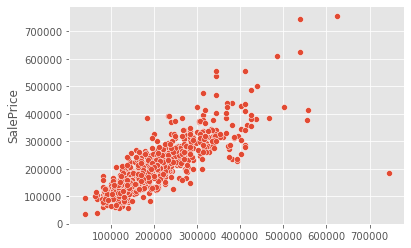

In [41]:
sns.scatterplot(x=model_cv, y=y_train);

In [42]:
# XGboost
import xgboost as xgb

model_xgb = xgb.XGBRegressor(random_state=42, n_jobs=-1)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [43]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [44]:
model_xgb.feature_importances_[:5]

array([0.00058355, 0.0016638 , 0.29598227, 0.00304785, 0.00388361],
      dtype=float32)

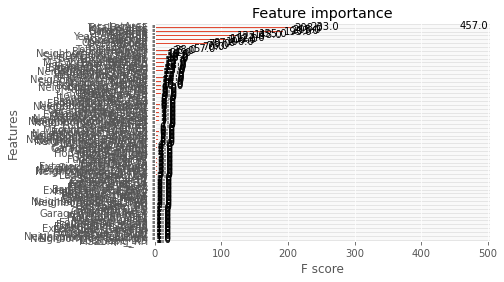

In [45]:
xgb.plot_importance(model_xgb);

In [46]:
score_xgb = model_xgb.score(X_valid, y_valid)
score_xgb

0.8911804228485998

In [47]:
y_pred_xgb = model_xgb.predict(re_test)
y_pred_xgb[:5]

array([121154.92, 158728.7 , 183186.7 , 193142.52, 189922.98],
      dtype=float32)

In [48]:
y_pred_xgb2 = model_xgb.predict(X_valid)
y_pred_xgb2[:5]

array([182539.62, 121222.04, 214967.27, 103854.95, 192060.83],
      dtype=float32)

In [71]:
xgb_mae = abs(y_valid - y_pred_xgb2).mean()
xgb_mae

16806.006529850747

In [74]:
xgb_rmse = np.sqrt((y_valid - y_pred_xgb2) ** 2).mean()
xgb_rmse

16806.006529850747

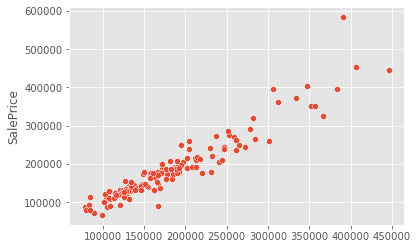

In [67]:
sns.scatterplot(x=y_pred_xgb2, y=y_valid);

In [100]:
# 제출
file_name1 = f"submission_{xgb_rmse:.4f}.csv"
sub["SalePrice"] = y_pred_xgb
sub.to_csv(file_name1)

# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name1)

,Id,SalePrice
0,1461,121154.92
1,1462,158728.70
2,1463,183186.70
3,1464,193142.52
4,1465,189922.98
...,...,...
1454,2915,75619.16
1455,2916,85718.89
1456,2917,168282.11
1457,2918,135883.55


# 딥러닝 시행

In [51]:
import tensorflow as tf

In [52]:
input_shape = X_train.shape[1]
input_shape

214

In [53]:
tra_tar.value_counts()

140000    20
135000    16
145000    14
155000    14
110000    13
          ..
289000     1
226700     1
430000     1
91300      1
147500     1
Name: SalePrice, Length: 620, dtype: int64

In [54]:
# 회귀는 출력층 저렇게 생겼다. 암기하도록
model_tf = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=128, input_shape=[input_shape]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(1)
])

In [55]:
model_tf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=["mae", "mse"],
              metrics=["mae", "mse"])

In [56]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               27520     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 60,673
Trainable params: 60,673
Non-trainable params: 0
_________________________________________________________________


In [57]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=100)
history = model_tf.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[early_stop], validation_split=0.2)

In [58]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
350,21810.101562,21810.101562,1.217306e+09,21263.740234,21263.740234,2.276831e+09
351,20655.878906,20655.878906,1.073205e+09,31381.234375,31381.234375,3.226684e+09
352,20359.730469,20359.730469,1.018183e+09,39567.042969,39567.042969,3.261025e+09
353,24540.056641,24540.056641,1.374608e+09,20580.730469,20580.730469,2.144645e+09
354,21780.955078,21780.955078,1.151661e+09,26871.093750,26871.093750,2.466259e+09


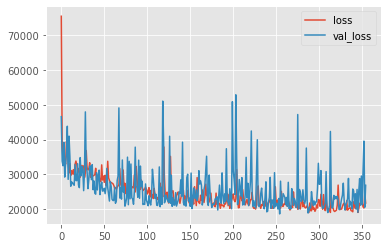

In [59]:
df_hist[["loss", "val_loss"]].plot();

In [60]:
y_pred = model_tf.predict(X_valid)
y_pred.shape

5/5 [==============================] - 0s 997us/step


(134, 1)

In [61]:
# y_predict
y_predict = y_pred.flatten().astype(int)
y_predict

array([210911, 144329, 256545, 126062, 207791, 187086, 222563, 145296,
       183849, 321288, 195465, 293334, 228877, 158360, 411960, 208835,
       275481, 145024, 164768, 171838, 212460, 219233, 134937, 243813,
       280308, 149570, 164244, 125973, 214857, 466037, 158581, 162873,
       299525, 222926, 206088, 289654, 187524, 120092, 175415, 111671,
       222089, 120743, 213616, 276974, 187485, 274223, 142593, 121023,
       150623, 159580, 155281, 190955, 152537, 239534, 390528, 118535,
       177656, 199892, 161419, 271218, 203781, 175941, 131313, 255199,
       232144, 303048, 141424, 269048, 176536, 149229, 328753, 258354,
       146631, 334818,  99028, 276846, 160149, 449471, 107833, 299250,
       147663, 127222, 173031, 200267, 224474, 226158, 150045, 216781,
       180843, 170495, 141368, 253818, 178142, 163997, 211333, 196762,
       176123, 163929, 205127, 351519, 111429, 102161, 143059, 134408,
       148592, 430747, 122532, 230279, 144063, 114579, 200849, 205466,
      

In [62]:
test_loss, test_mae, test_mse = model_tf.evaluate(X_valid, y_valid)
test_loss, test_mae, test_mse

5/5 [==============================] - 0s 1ms/step - loss: 25221.0410 - mae: 25221.0410 - mse: 1178484736.0000


(25221.041015625, 25221.041015625, 1178484736.0)

In [63]:
test_rmse = test_mse ** 0.5
test_rmse

34329.06546936575

In [78]:
mae_tf = abs(y_valid - y_predict).mean()
mae_tf

25220.701492537315

In [98]:
rmse_tf = np.sqrt(((y_valid - y_predict) ** 2).mean())
rmse_tf

34328.79294846394

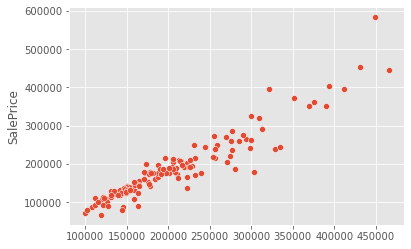

In [83]:
sns.scatterplot(x=y_predict, y=y_valid);

In [88]:
y_tf_pre = model_tf.predict(re_test)

46/46 [==============================] - 0s 776us/step


In [89]:
y_tf_pre = y_tf_pre.flatten().astype(int)
y_tf_pre

array([141632, 118295, 208340, ..., 189107, 135985, 234820])

In [99]:
# 제출
file_name2 = f"submission_{rmse_tf:.4f}.csv"
sub["SalePrice"] = y_tf_pre
sub.to_csv(file_name2)

# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name2)

,Id,SalePrice
0,1461,141632
1,1462,118295
2,1463,208340
3,1464,205417
4,1465,193535
...,...,...
1454,2915,100798
1455,2916,106806
1456,2917,189107
1457,2918,135985


# 종합

In [66]:
"""
mae 기준으로 
cv를 이용하여 예측한 값과
XGboost를 이용하여 예측한 값 그리고
딥러닝(텐서플로우)을 이용하여 예측한 값을 비교하면
XGboost, 딥러닝, cv 순으로 성능이 잘 나왔습니다.
정확한 값은 제출을 하여 비교를 하는 것이 따질 수 있을 것 같습니다.
꼭 딥러닝이라고 가장 좋은 성능을 내는 것이 아닌, 상황에 따라 머신러닝에서도 더 좋은 성능이 나올 수 있음을 알 수 있습니다.
예측값과 실제값을 비교한 그래프도 머신러닝과 딥러닝 둘 다 비슷한 양상을 보이며 그려졌습니다.
"""

'\nmae 기준으로 \ncv를 이용하여 예측한 값과\nXGboost를 이용하여 예측한 값 그리고\n딥러닝(텐서플로우)을 이용하여 예측한 값을 비교하면\nXGboost, 딥러닝, cv 순으로 성능이 잘 나왔습니다.\n정확한 값은 제출을 하여 비교를 하는 것이 따질 수 있을 것 같습니다.\n꼭 딥러닝이라고 가장 좋은 성능을 내는 것이 아닌, 상황에 따라 머신러닝에서도 더 좋은 성능이 나올 수 있음을 알 수 있습니다.\n예측값과 실제값을 비교한 그래프도 머신러닝과 딥러닝 둘 다 비슷한 양상을 보이며 그려졌습니다.\n'